# Exercises

8) Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGVClassifier on the same dataset. See if you can get them to produce roughly the same model

In [168]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sns.set()

wine = load_wine()
wine.feature_names

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target

# Nice! So wines 0 and 2 are linear separable!
X = df[df['target'] != 1][['flavanoids', 'od280/od315_of_diluted_wines']]
y = df[df['target'] != 1]['target']
C = 100

linearsvc_pipe = Pipeline([
    ('scaled', StandardScaler()),
    ('model', LinearSVC(loss="hinge", C=C))
])
linearsvc_pipe.fit(X, y)

svc_pipe = Pipeline([
    ('scaled', StandardScaler()),
    ('model', SVC(kernel='linear', C=C))
])
svc_pipe.fit(X, y)


sgd_pipe = Pipeline([
    ('scaled', StandardScaler()),
    ('model', SGDClassifier(loss="hinge", alpha = 0.017, max_iter = 50, tol=-np.infty, random_state=42))
])
sgd_pipe.fit(X, y)

Pipeline(steps=[('scaled', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.017, max_iter=50, random_state=42,
                               tol=-inf))])

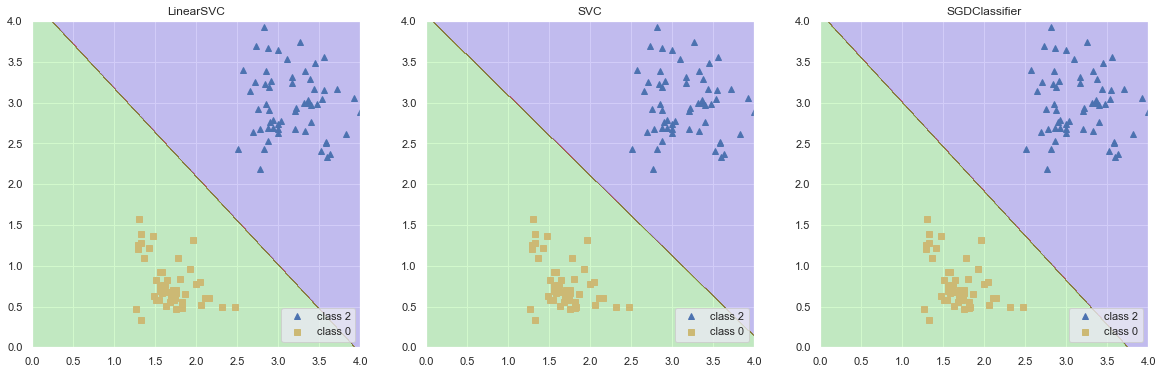

In [166]:
def plot_classes():
    plt.plot(df['od280/od315_of_diluted_wines'][df['target']==0], df['flavanoids'][df['target']==0], 'b^', label='class 2')
    plt.plot(df['od280/od315_of_diluted_wines'][df['target']==2], df['flavanoids'][df['target']==2], 'sy', label='class 0')
    plt.legend(loc='lower right')

def plot_decision_boundaries(clf, x1lim=(0,4), x2lim=(0,4)):
    X1_s = np.linspace(*x1lim, 1000)
    X2_s = np.linspace(*x2lim, 1000)
    
    X1s, X2s = np.meshgrid(X1_s, X2_s)
    
    X = np.c_[X1s.flatten(), X2s.flatten()]
    
    y = clf.predict(X).reshape(X1s.shape)
    
    plt.contourf(X1s, X2s, y, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('LinearSVC')
plot_classes()
plot_decision_boundaries(linearsvc_pipe)

plt.subplot(1,3,2)
plt.title('SVC')
plot_classes()
plot_decision_boundaries(svc_pipe)

plt.subplot(1,3,3)
plt.title('SGDClassifier')
plot_classes()
plot_decision_boundaries(sgd_pipe)

9) Train an SVM Classifier on the MNIST dataset. Since SVM Classifier are binary classifier, you will need to use one-versus-all to classify all 10 digits. You may need to tune the hyperparameter using small validation sets to speed up the process. What accuracy can you reach?

In [179]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_scaled = StandardScaler().fit_transform(X)

X_train = X_scaled[:60000]
y_train = y[:60000]
X_test = X_scaled[60000:]
y_test = y[60000:]

In [173]:
svc = LinearSVC()
svc.fit(X_train, y_train)

svc.score(X_test, y_test)
# A linear model is to simple for the MNIST Dataset

/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [177]:
svc = SVC()
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

0.9792

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_clf = SVC()

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=6.951689413631444, gamma=0.002986690083880234 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=6.951689413631444, gamma=0.002986690083880234, total=   0.8s
[CV] C=6.951689413631444, gamma=0.002986690083880234 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .. C=6.951689413631444, gamma=0.002986690083880234, total=   0.8s
[CV] C=6.951689413631444, gamma=0.002986690083880234 .................
[CV] .. C=6.951689413631444, gamma=0.002986690083880234, total=   0.9s
[CV] C=2.5470800759143954, gamma=0.007872403553338401 ................
[CV] . C=2.5470800759143954, gamma=0.007872403553338401, total=   0.9s
[CV] C=2.5470800759143954, gamma=0.007872403553338401 ................
[CV] . C=2.5470800759143954, gamma=0.007872403553338401, total=   0.9s
[CV] C=2.5470800759143954, gamma=0.007872403553338401 ................
[CV] . C=2.5470800759143954, gamma=0.007872403553338401, total=   0.9s
[CV] C=4.287992072300401, gamma=0.08616996300405666 ..................
[CV] ... C=4.287992072300401, gamma=0.08616996300405666, total=   0.9s
[CV] C=4.287992072300401, gamma=0.08616996300405666 ..................
[CV] ... C=4.287992072300401, gamma=0.08616996300405666, total=   0.9s
[CV] C=4.287992072300401, gamma=0.08616996300405666 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   26.6s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2bd39b9828>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2bd39b9470>},
                   verbose=2)

In [209]:
svm_clf_tuned = SVC(**rnd_search_cv.best_params_)
svm_clf_tuned.fit(X_train, y_train)

SVC(C=7.074698012785104, gamma=0.001512675997748727)

In [214]:
svm_clf_tuned.score(X_train, y_train)

0.9990666666666667

In [215]:
svm_clf_tuned.score(X_test, y_test)

0.9722

10) Train an SVM regresso on the California housing Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

def get_svr_pipe_scaled(clf):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', clf)
    ])

linear_svr_pipe = get_svr_pipe_scaled(LinearSVR(C=10))
linear_svr_pipe.fit(X_train, y_train)
linear_svr_pipe.score(X_test, y_test)

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

kernel_svr_pipe = get_svr_pipe_scaled(SVR(C=5))
kernel_svr_pipe.fit(X_train, y_train)

y_pred = kernel_svr_pipe.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('mse: ', mse)
print('rmse: ', rmse)

mse:  0.2998235293411903
rmse:  0.547561438873475


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_reg = SVR()

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distributions, n_iter=10, verbose=2, cv=3, n_jobs=-1)
rnd_search_cv.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
